# Computing Hessian and Jacobian

In [1]:
import torch
from torch.autograd.functional import hessian, jacobian
import matplotlib.pyplot as plt
import numpy as np

In [22]:
x = torch.tensor([2.0],dtype=torch.double)
f = lambda x,a,b: (a**2)*x**2 + b*x

def compute_loss(a,b):
    loss = torch.nn.MSELoss()
    return loss(f(x,a,b),f(x,1,1))

In [49]:
a,b = torch.tensor(np.linspace(-1,2,50)),torch.tensor(np.linspace(-1,2,50))
J = jacobian(compute_loss, (a,b))

/home/ninja/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


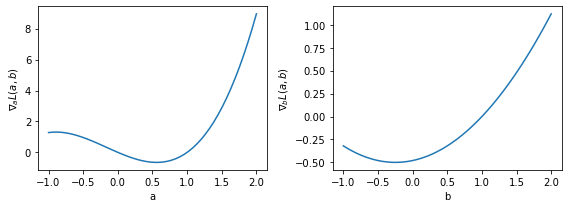

In [41]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(a.numpy(),J[0].numpy())
plt.xlabel("a")
plt.ylabel(r"$\nabla_{a} L(a,b)$")
plt.subplot(122)
plt.plot(b.numpy(),J[1].numpy())
plt.xlabel("b")
plt.ylabel(r"$\nabla_{b} L(a,b)$")
plt.tight_layout()
plt.show()

$$\mathcal{L}(w) \approx \mathcal{L}(w^{(0)}) + \left(w - w^{(0)} \right)^{\top} \nabla \mathcal{L}\vert_{w=w^{(0)}} + \frac{1}{2}\left(w - w^{(0)} \right)^{\top} H \left[\mathcal{L}\right] \vert_{w=w^{(0)}} \left(w - w^{(0)} \right)$$

In [50]:
a,b = torch.tensor([1.0]),torch.tensor([2.0])
H = hessian(compute_loss, (a,b))

Temos $w^{(0)} = [a_{0},b_{0}] = [1,1]$ e $w = [a,b] = [1,2]$. A derivada direcional de segunda ordem é dada por $\left(w - w^{(0)} \right)^{\top} H \left[\mathcal{L}\right] \vert_{w=w^{(0)}} \left(w - w^{(0)} \right)$

In [73]:
H_ = np.array([[H[0][0].numpy(),H[0][1].numpy()],[H[1][0].numpy(),H[1][1].numpy()]]).reshape(2,2)
v = np.array([[0],[1]]) # (w - w0)

In [75]:
H_

array([[160.,  32.],
       [ 32.,   8.]], dtype=float32)

In [74]:
v.T @ H_ @ v

array([[8.]])

Esse valor pode então ser usado para calcular uma aproximação de segunda ordem do erro.